### CORE - IMAGERY ACQUISITION

Step 1b

DesCartes Labs tiling geometry is used to tile study area geography. High-res imagery tiles are inspected and downloaded.

Date: 2019-09-12
Author: Eric Pietraszkiewicz

#### IMPORT STATEMENTS

In [1]:
import shapely
from shapely.geometry import Polygon
import cartopy
import matplotlib.pyplot as plt
import descarteslabs as dl
import fiona

import UTC_util_shp
import UTC_util_raster
import UTC_util_imagery
import UTC_util_descartes

import random

import subprocess

/home/ericp/anaconda3/envs/pcp-env/lib/python3.7/site-packages/osgeo/gdal.py:107: DeprecationWarning: gdal.py was placed in a namespace, it is now available as osgeo.gdal
  DeprecationWarning)


#### SET KEY VARIABLES

In [2]:
place = 'Santa_Monica'

naip1_dict = {}

imgtype, source, product= 'NAIP', 'naip1', u'usda:naip:rgbn:v1'
# imgtype, source, product= 'SPOT', 'spot2', u'airbus:oneatlas:spot:v2'
# imgtype, source, product= 'Pleiades', 'plds2', u'airbus:oneatlas:phr:v2'

data_root='/datadrive/UTC/'
data_path=data_root+place+'/'

suffix='A' 

tile_resolution = 1
tile_size = 256
tile_pad = 0

processing_level = None
bands=['red','green','blue','nir'];  # S2, Lx
resolution=tile_resolution  # Lx:15 S2:10

#### LOAD AND INSPECT STUDY AREA

Santa_Monica Santa_Monica
simple polygon
center co-ordinates -118.48058205883515 34.02288192785845


/home/ericp/Notebooks/UTC_util_shp.py:30: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  pol = c.next()


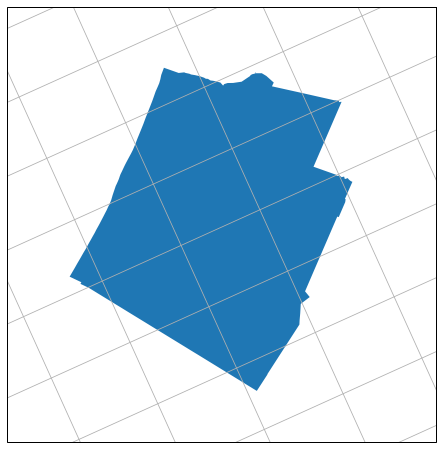

In [3]:
shape, albers, lonlat_crs, place_shp = UTC_util_shp.draw_shp(data_root, place)

#### GENERATE TILES

number of tiles to cover region 391


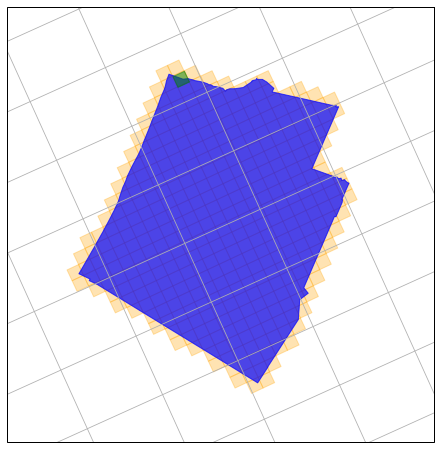

In [4]:
tiles = dl.raster.dltiles_from_shape(tile_resolution, tile_size, tile_pad, shape)
single_tile_id = 4
highlights = {single_tile_id:'green'}
UTC_util_shp.draw_tiled_area(shape, tiles, albers, lonlat_crs, highlights=highlights)

-------

#### SEARCH AND ACQUIRE IMAGERY (skip to download if scenes selected already)

In [ ]:
# feature_collection = dl.metadata.search(product=[product], start_time='2019-01-01', end_time='2019-11-01', 
#                                         cloud_fraction_0=0.5, limit=75, geom=shape['geometry'])

feature_collection = dl.metadata.search(product=[product], start_time='2015-09-27', end_time='2016-10-18', geom=shape['geometry'])
s2_ids = [f['id'] for f in feature_collection['features']]
s2_ids.sort()
# print (len(s2_ids), s2_ids)

#### VIEW IMAGE EXTENTS

In [ ]:
s2_imgs = s2_ids

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(projection=albers) # Specify projection of the map here

shapes = []
for s2_img in s2_imgs:
    metadata = dl.metadata.get(s2_img)
    shapes.append(shapely.geometry.shape(metadata['geometry']))

ax.add_geometries(shapes, lonlat_crs, alpha=0.3, color='orange')
ax.add_geometries([shapely.geometry.shape(shape['geometry'])],
                   lonlat_crs, alpha=0.5, color='blue')

# Get a bounding box of the combined scenes
union = shapely.geometry.MultiPolygon(polygons=shapes)
bbox = union.bounds
ax.set_extent((bbox[0], bbox[2], bbox[1], bbox[3]),crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)

plt.show()

#### INSPECT IMAGERY

In [ ]:
# util_descartes.show_scene(s2_imgs[:],bands=['red','green','blue'],scales=[[0,3000],[0,3000],[0,3000],], geom=shape['geometry'], resolution=80)
UTC_util_descartes.show_scene(s2_imgs[:],bands=['red','green','blue'],scales=[[0,255],[0,255],[0,255],], geom=shape['geometry'], resolution=10)

-------

#### SPECIFY IMAGE DICTIONARIES

In [5]:
naip1_dict = {}

# Santa Monica
# start_time='2016-01-01', end_time='2016-12-31'
naip1_dict['A']=['usda:naip:rgbn:v1:meta_m_3311805_nw_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411860_se_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411861_sw_11_h_20160616_v1']

# South_Bay 
# start_time='2015-09-27', end_time='2016-10-18'
# naip1_dict['A'] = ['usda:naip:rgbn:v1:meta_m_3311805_ne_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3311805_se_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3311806_ne_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3311806_nw_11_h_20160710_v1', 'usda:naip:rgbn:v1:meta_m_3311806_se_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3311806_sw_11_h_20160710_v1', 'usda:naip:rgbn:v1:meta_m_3311813_ne_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3311813_se_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3311814_ne_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3311814_nw_11_h_20160710_v1', 'usda:naip:rgbn:v1:meta_m_3311814_se_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3311814_sw_11_h_20160710_v1', 'usda:naip:rgbn:v1:meta_m_3311821_ne_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3311822_ne_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3311822_nw_11_h_20160710_v1']

# Los Angeles
# start_time='2015-09-27', end_time='2016-10-18'
# naip1_dict['A'] = ['usda:naip:rgbn:v1:meta_m_3311805_ne_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3311805_nw_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3311805_se_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3311805_sw_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3311806_ne_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3311806_nw_11_h_20160710_v1', 'usda:naip:rgbn:v1:meta_m_3311806_se_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3311806_sw_11_h_20160710_v1', 'usda:naip:rgbn:v1:meta_m_3311807_nw_11_h_20160706_v1', 'usda:naip:rgbn:v1:meta_m_3311807_sw_11_h_20160706_v1', 'usda:naip:rgbn:v1:meta_m_3311814_ne_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3311814_se_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3311814_sw_11_h_20160710_v1', 'usda:naip:rgbn:v1:meta_m_3311815_nw_11_h_20160706_v1', 'usda:naip:rgbn:v1:meta_m_3311815_sw_11_h_20160706_v1', 'usda:naip:rgbn:v1:meta_m_3311822_ne_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3311822_nw_11_h_20160710_v1', 'usda:naip:rgbn:v1:meta_m_3311823_nw_11_h_20160706_v1', 'usda:naip:rgbn:v1:meta_m_3411843_se_11_h_20160512_v1', 'usda:naip:rgbn:v1:meta_m_3411844_ne_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411844_se_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411844_sw_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411845_ne_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3411845_nw_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3411845_se_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3411845_sw_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3411846_se_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3411846_sw_11_h_20160709_v1', 'usda:naip:rgbn:v1:meta_m_3411847_sw_11_h_20160706_v1', 'usda:naip:rgbn:v1:meta_m_3411851_ne_11_h_20160512_v1', 'usda:naip:rgbn:v1:meta_m_3411851_se_11_h_20160512_v1', 'usda:naip:rgbn:v1:meta_m_3411852_ne_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411852_nw_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411852_se_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411852_sw_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411853_ne_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3411853_nw_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3411853_se_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3411853_sw_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3411854_ne_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3411854_nw_11_h_20160709_v1', 'usda:naip:rgbn:v1:meta_m_3411854_se_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3411854_sw_11_h_20160709_v1', 'usda:naip:rgbn:v1:meta_m_3411855_se_11_h_20160706_v1', 'usda:naip:rgbn:v1:meta_m_3411855_sw_11_h_20160706_v1', 'usda:naip:rgbn:v1:meta_m_3411860_ne_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411860_nw_11_h_20160722_v1', 'usda:naip:rgbn:v1:meta_m_3411860_se_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411860_sw_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411861_ne_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3411861_nw_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411861_se_11_h_20160711_v1', 'usda:naip:rgbn:v1:meta_m_3411861_sw_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411862_ne_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3411862_nw_11_h_20160710_v1', 'usda:naip:rgbn:v1:meta_m_3411862_se_11_h_20160707_v1', 'usda:naip:rgbn:v1:meta_m_3411862_sw_11_h_20160710_v1', 'usda:naip:rgbn:v1:meta_m_3411863_ne_11_h_20160706_v1', 'usda:naip:rgbn:v1:meta_m_3411863_nw_11_h_20160706_v1', 'usda:naip:rgbn:v1:meta_m_3411863_se_11_h_20160706_v1', 'usda:naip:rgbn:v1:meta_m_3411863_sw_11_h_20160706_v1']

In [6]:
spot2_dict = {}

In [7]:
plds2_dict = {}

#### DOWNLOAD TILES

In [8]:
sample = False # set sample to True if 10% random sample of geography is desired

if sample == False:
    UTC_util_imagery.download_imagery(data_path, place, imgtype, source, 
                                      bands, shape, tiles, naip1_dict, 
                                      spot2_dict, plds2_dict, 
                                      processing_level=processing_level,
                                      tile_start=120)
elif sample == True:
    UTC_util_imagery.download_imagery_samp(0, suffix, data_path, place, 
                                           imgtype, source, bands, shape, tiles, 
                                           naip1_dict, spot2_dict, plds2_dict, 
                                           processing_level=processing_level, 
                                           tile_start=0)

naip1
A ['usda:naip:rgbn:v1:meta_m_3311805_nw_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411860_se_11_h_20160616_v1', 'usda:naip:rgbn:v1:meta_m_3411861_sw_11_h_20160616_v1']
downloading tile00120: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00120.tif
downloading tile00121: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00121.tif
downloading tile00122: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00122.tif
downloading tile00123: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00123.tif
downloading tile00124: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00124.tif
downloading tile00125: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00125.tif
downloading tile00126: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00126.tif
downloading tile00127: /datadrive/UTC/Santa_Monica/NA

downloading tile00193: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00193.tif
downloading tile00194: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00194.tif
downloading tile00195: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00195.tif
downloading tile00196: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00196.tif
downloading tile00197: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00197.tif
downloading tile00198: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00198.tif
downloading tile00199: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00199.tif
downloading tile00200: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00200.tif
downloading tile00201: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00201.tif
downloadin

downloading tile00268: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00268.tif
downloading tile00269: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00269.tif
downloading tile00270: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00270.tif
downloading tile00271: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00271.tif
downloading tile00272: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00272.tif
downloading tile00273: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00273.tif
downloading tile00274: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00274.tif
downloading tile00275: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00275.tif
downloading tile00276: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00276.tif
downloadin

downloading tile00343: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00343.tif
downloading tile00344: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00344.tif
downloading tile00345: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00345.tif
downloading tile00346: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00346.tif
downloading tile00347: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00347.tif
downloading tile00348: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00348.tif
downloading tile00349: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00349.tif
downloading tile00350: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00350.tif
downloading tile00351: /datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00351.tif
downloadin

#### MERGE TILES INTO MOSAIC & CROP

In [ ]:
zfill = 5
pad = tile_pad
qmarks = '?????'[0:zfill]

In [ ]:
path_template = data_path+imgtype+'/imagery/'+str(processing_level).lower()+'/'+ place+'_'+source+'_'+\
                suffix+'_'+str(resolution)+'m'+'_'+'p'+str(pad)+'_'+'tile'+qmarks+'.tif'
path_destination = data_path+imgtype+'/imagery/'+str(processing_level).lower()+'/'+ place+'_'+source+'_'+\
                suffix+'_'+str(resolution)+'m'+'_'+'p'+str(pad)+'_'+'complete.tif'

!gdal_merge.py -n 255 -a_nodata 255 -o {path_destination} {path_template}

In [ ]:
inputr = data_path+imgtype+'/imagery/'+str(processing_level).lower()+'/'+\
                    place+'_'+source+'_'+suffix+'_'+str(resolution)+'m'+'_'+'p'+str(pad)+'_'+'complete.tif'


outputr = data_path+imgtype+'/imagery/'+str(processing_level).lower()+'/'+\
                    place+'_'+source+'_'+suffix+'_'+str(resolution)+'m'+'_'+'p'+str(pad)+'_'+'complete_cut.tif'


UTC_util_raster.crop_raster(place_shapefile, inputr, outputr)

--------